In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import palettable

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coords

In [44]:
plt.rc('figure', dpi=120)

In [62]:
%%capture
brewerfile = "/Users/semyeong/projects/KronosKrios/data/jb.vot"
t = Table.read(brewerfile, format='votable', table_id='J_ApJS_225_32_stars')

In [133]:
df = t.to_pandas()

In [134]:
df['Name'] = df['Name'].str.decode('utf-8')
df.columns = df.columns.str.replace('__(?P<elem>\w+)_H_', lambda m: m.group('elem')+'_H')

In [65]:
from corner import corner

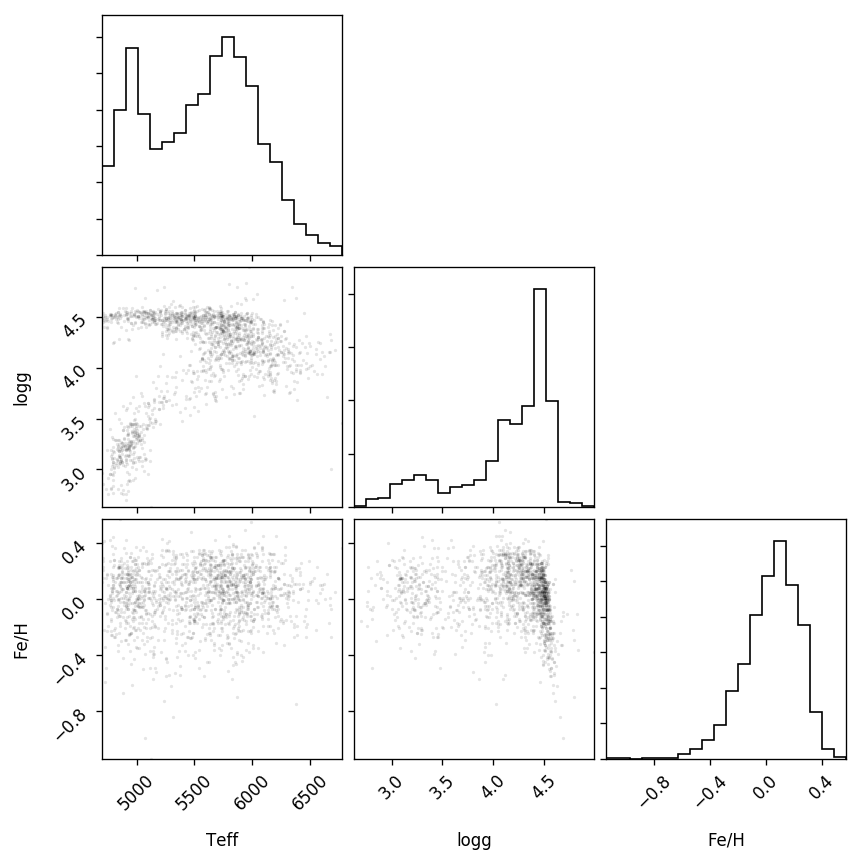

In [67]:
corner(df[['Teff','logg','Fe_H']].values, plot_contours=False, plot_density=False,
       labels=['Teff', 'logg', 'Fe/H']);

In [136]:
ik = np.where(df.Name == 'HD 240430')[0]

In [138]:
df.iloc[ik]

,_RAJ2000,_DEJ2000,SPOCS,Name,Teff,logg,M_H,S,logRhk,Vbr,...,Miso,b_Miso,B_Miso,logg2,e_logg2,Age,b_Age,B_Age,CCat,Simbad
1607,358.0383,59.7075,3240.0,HD 240430,5803.0,4.33,0.18,0.15,-5.09,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,b'Simbad'


In [139]:
cond_teff = (np.abs(df['Teff']-5800)<100)
cond_logg = (np.abs(df['logg']-4.3)<0.05)
cond_feh = (np.abs(df['Fe_H']-0.2) < 0.05)

In [140]:
print((cond_teff & cond_logg & cond_feh).sum())

17


In [141]:
idx = np.where(cond_teff & cond_logg & cond_feh)[0]

In [142]:
df.columns

Index(['_RAJ2000', '_DEJ2000', 'SPOCS', 'Name', 'Teff', 'logg', 'M_H', 'S',
       'logRhk', 'Vbr', 'Vsini', 'Vmac', 'Vrad', 'SNR', 'Crms', 'Lrms', 'N',
       'C_H', 'N_H', 'O_H', 'Na_H', 'Mg_H', 'Al_H', 'Si_H', 'Ca_H', 'Ti_H',
       'V_H', 'Cr_H', 'Mn_H', 'Fe_H', 'Ni_H', 'Y_H', 'RAJ2000', 'DEJ2000',
       'Vmag', 'Dist', 'logL', 'e_logL', 'Rstar', 'e_Rstar', 'Mstar',
       'e_Mstar', 'Miso', 'b_Miso', 'B_Miso', 'logg2', 'e_logg2', 'Age',
       'b_Age', 'B_Age', 'CCat', 'Simbad'],
      dtype='object')

In [143]:
elems = [s+'_H' for s in ['C', 'N', 'O', 'Na', 'Mg', 'Al', 'Si', 'Ca', 'Ti', 'V', 'Cr', 'Mn',
         'Fe', 'Ni', 'Y']]

In [144]:
elems_ordered = [
    s+'_H' for s in ['C', 'N', 'O', 'Na', 'Mn', 'Cr','Si', 'Fe', 'Mg', 'Ni', 'V', 'Ca', 'Ti', 'Al', 'Y']]

In [145]:
df.loc[idx, elems_ordered].median(axis=0)

C_H     0.16
N_H     0.19
O_H     0.18
Na_H    0.25
Mn_H    0.25
Cr_H    0.20
Si_H    0.19
Fe_H    0.20
Mg_H    0.17
Ni_H    0.23
V_H     0.18
Ca_H    0.21
Ti_H    0.19
Al_H    0.22
Y_H     0.18
dtype: float64

In [146]:
df.loc[idx]

,_RAJ2000,_DEJ2000,SPOCS,Name,Teff,logg,M_H,S,logRhk,Vbr,...,Miso,b_Miso,B_Miso,logg2,e_logg2,Age,b_Age,B_Age,CCat,Simbad
5,4.6746,-8.0531,13.0,HD 1461,5739.0,4.34,0.16,0.16,-5.01,3.9,...,1.07,1.05,1.09,4.39,0.03,4.1,2.9,5.3,1.0,b'Simbad'
93,72.8725,35.8150,232.0,HD 30708,5707.0,4.26,0.15,0.15,-5.07,3.6,...,1.10,1.07,1.12,4.25,0.03,6.3,5.6,7.2,1.0,b'Simbad'
128,95.4313,-0.5392,307.0,HD 44420,5756.0,4.28,0.26,0.15,-5.10,3.8,...,1.10,1.08,1.12,4.41,0.03,3.0,1.7,4.1,1.0,b'Simbad'
167,124.8058,14.2006,377.0,HD 69809,5815.0,4.27,0.26,0.15,-5.10,3.8,...,1.17,1.14,1.20,4.22,0.05,4.5,3.9,5.5,1.0,b'Simbad'
188,150.2529,31.9236,436.0,HD 86728,5742.0,4.31,0.20,0.15,-5.09,4.2,...,1.09,1.07,1.11,4.33,0.03,4.9,3.8,6.0,1.0,b'Simbad'
226,191.6283,-11.8125,540.0,HD 111031,5725.0,4.26,0.23,0.15,-5.08,3.9,...,1.10,1.08,1.12,4.30,0.03,5.2,4.2,6.3,1.0,b'Simbad'
247,220.3175,-4.9450,613.0,HD 129191,5770.0,4.32,0.22,0.16,-5.02,4.0,...,1.09,1.07,1.12,4.40,0.05,3.2,1.6,4.6,1.0,b'Simbad'
365,344.3667,20.7689,990.0,HD 217014,5758.0,4.32,0.18,0.15,-5.06,4.1,...,1.09,1.07,1.11,4.34,0.03,4.7,3.6,5.7,1.0,b'Simbad'
525,281.7108,47.4133,2149.0,KIC-10319590,5771.0,4.35,0.18,0.31,-4.51,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,b'Simbad'
832,299.5350,40.4778,2460.0,KIC-5308537,5890.0,4.28,0.22,0.12,-5.41,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,b'Simbad'


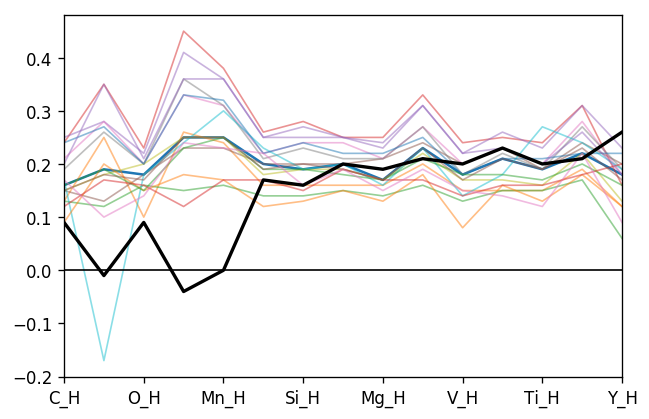

In [150]:
ax = df.loc[idx, elems_ordered].median(axis=0).plot()
df.loc[idx, elems_ordered].T.plot(legend=False, alpha=.5, lw=1, ax=ax);
df.loc[ik, elems_ordered].T.plot(legend=False, c='k',lw=2, ax=ax);

plt.axhline(0, lw=1, c='k')
# plt.ylim(-0.2,0.15);
# plt.xticks(np.arange(len(elems_ordered)), );